# hERG channel

Write about the hERG channel https://en.wikipedia.org/wiki/HERG

In [1]:
import utils
import matplotlib.pyplot as plt

In [2]:
utils.list_ode_models()

['tentusscher_noble_noble_panfilov_2006_c.ode',
 'tentusscher_2004_mcell_updated.ode',
 'paci_hyttinen_aaltosetala_severi_ventricularVersion.ode']

In [3]:
model_name = "tentusscher_noble_noble_panfilov_2006_c"

In [4]:
model = utils.load_model(model_name, rebuild=False)

Loaded ODE model 'tentusscher_noble_noble_panfilov_2006_c' with:
     Num full states: 17
      Num parameters: 46


In [5]:
t, u = model.solve(t_start=0, t_end=1000.0, dt=0.1)

In [6]:
V_index = model.state_index("V")
print(V_index)

15


In [7]:
V = u[:, V_index]

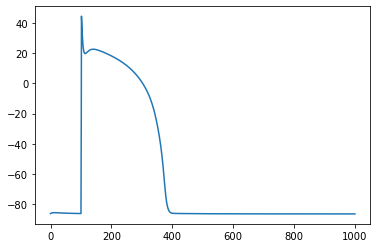

In [8]:
fig, ax = plt.subplots()
ax.plot(t, V)

In [9]:
# List all monitor names
# model.monitor_names()
parameters = model.default_parameters()
i_Kr = model.monitor_single("i_Kr", u, t, parameters)

[ 3.00000000e-02  5.40500000e+00  9.60000000e-02  2.45000000e-01
  1.48380000e+01  2.90000000e-04  1.75000000e-04  5.92000000e-04
  7.30000000e-02  4.00000000e+01  1.00000000e+00  1.36200000e+00
  1.00000000e+03  1.00000000e-01  1.38000000e+00  8.75000000e+01
  2.50000000e+00  3.50000000e-01  5.00000000e-04  8.25000000e-01
  1.46000000e-02  1.50000000e-01  1.00000000e+01  2.00000000e+00
  1.00000000e-03  3.00000000e-01  2.50000000e-04  8.00000000e-05
  1.09400000e-03  4.25000000e-04  1.64640000e-02  2.50000000e-01
  8.23200000e-03  2.00000000e+00  1.40000000e+02 -5.20000000e+01
  5.00000000e+04  1.00000000e+03  1.00000000e+00  1.00000000e+02
  1.85000000e-01  9.64853415e+04  8.31447200e+03  3.10000000e+02
  1.64040000e-02  5.40000000e+00]
[ 3.00000000e-02  5.40500000e+00  9.60000000e-02  2.45000000e-01
  1.48380000e+01  2.90000000e-04  1.75000000e-04  5.92000000e-04
  7.30000000e-02  4.00000000e+01  1.00000000e+00  1.36200000e+00
  1.00000000e+03  1.00000000e-01  1.38000000e+00  8.7500

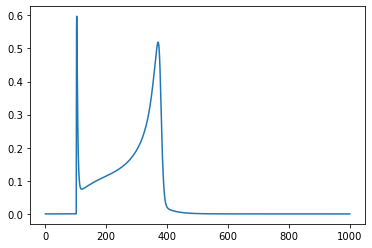

In [10]:
fig, ax = plt.subplots()
ax.plot(t, i_Kr)

In [18]:
model.parameter_names()

['P_kna',
 'g_K1',
 'g_Kr',
 'g_Ks',
 'g_Na',
 'g_bna',
 'g_CaL',
 'g_bca',
 'g_to',
 'K_mNa',
 'K_mk',
 'P_NaK',
 'K_NaCa',
 'K_sat',
 'Km_Ca',
 'Km_Nai',
 'alpha',
 'gamma',
 'K_pCa',
 'g_pCa',
 'g_pK',
 'Buf_c',
 'Buf_sr',
 'Ca_o',
 'K_buf_c',
 'K_buf_sr',
 'K_up',
 'V_leak',
 'V_sr',
 'Vmax_up',
 'a_rel',
 'b_rel',
 'c_rel',
 'tau_g',
 'Na_o',
 'IstimAmplitude',
 'IstimEnd',
 'IstimPeriod',
 'IstimPulseDuration',
 'IstimStart',
 'Cm',
 'F',
 'R',
 'T',
 'V_c',
 'K_o']

In [11]:
parameters = model.default_parameters()
parameters["g_Kr"] *= 0.2
t2, u2 = model.solve(t_start=0, t_end=1000.0, dt=0.1, parameters=parameters)

Update paramameter g_Kr from 0.096 to 0.019200000000000002


In [12]:
V_kr_block = u2[:, V_index]

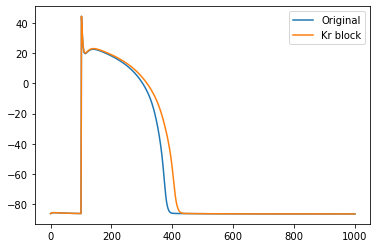

In [13]:
fig, ax = plt.subplots()
ax.plot(t, V, label="Original")
ax.plot(t2, V_kr_block, label="Kr block")
ax.legend(loc="best")

In [14]:
i_Kr_block = model.monitor_single("i_Kr", u, t, parameters=parameters)

In [48]:
fig, ax = plt.subplots()
ax.plot(t, i_Kr, label="Original")
ax.plot(t2, i_Kr_block, label="Kr block")
ax.legend(loc="best")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [22]:
import ipywidgets as widgets

In [28]:
%matplotlib widget
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(t, V, label="Original")
line_V, = ax[0].plot(t, V, label="Kr block")
ax[0].legend(loc="best")
ax[0].set_title("Voltage")
ax[1].plot(t, i_Kr, label="Original")
line_iKr, = ax[1].plot(t, i_Kr, label="Kr block")
ax[1].legend(loc="best")
ax[1].set_title("i Kr")

@widgets.interact(block=(-1, 1, 0.1))
def Kr_block(block):
    parameters = model.default_parameters().copy()
    parameters["g_Kr"] *= (1 + block)
    t2, u2 = model.solve(t_start=0, t_end=1000.0, dt=0.1, parameters=parameters)
    i_Kr_block = model.monitor_single("i_Kr", u2, t2, parameters=parameters)
    V_kr_block = u2[:, V_index]
    line_V.set_ydata(V_kr_block)
    line_iKr.set_ydata(i_Kr_block)
    fig.canvas.draw_idle()
 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(FloatSlider(value=0.0, description='block', max=1.0, min=-1.0), Output()), _dom_classes=…